In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and total charges are recorded

In [5]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [9]:
df['customerID'].duplicated().sum()

0

#converted 0 and 1 value of senior citizen to yes/no to make it easier to understand

In [10]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [11]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


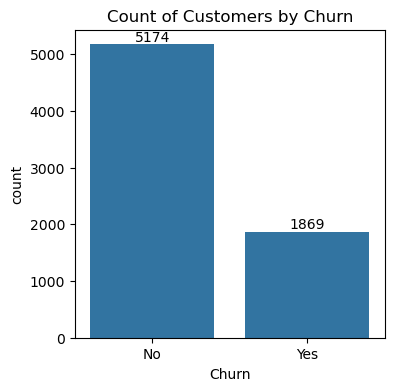

In [12]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

In [13]:
gb=df.groupby("Churn").agg({'Churn':'count'})
gb

,Churn
Churn,
No,5174
Yes,1869


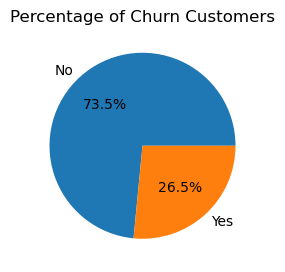

In [14]:
plt.figure(figsize=(3,4))
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.1f%%')
plt.title('Percentage of Churn Customers')
plt.show()

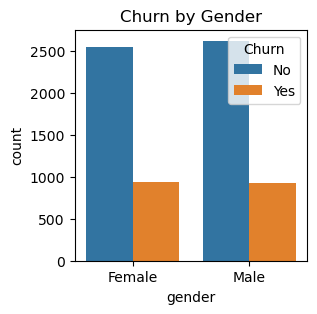

In [15]:
plt.figure(figsize=(3,3))
sns.countplot(x='gender',hue='Churn',data=df)
plt.title('Churn by Gender')
plt.show()

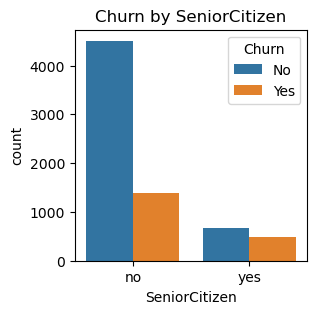

In [16]:
plt.figure(figsize=(3,3))
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
plt.title('Churn by SeniorCitizen')
plt.show()

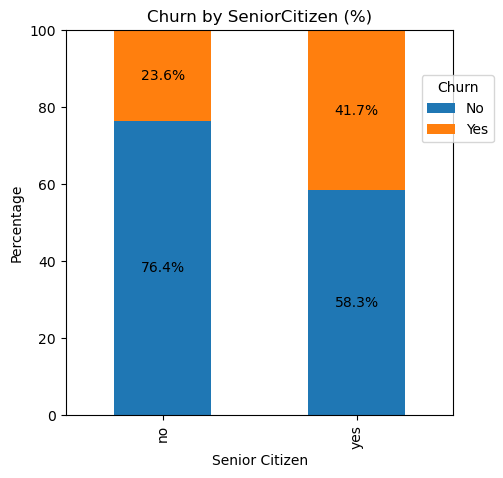

In [21]:
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100   

ax = ct_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(5,5),
    color=["#1f77b4", "#ff7f0e"] 
)

for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center')

plt.title("Churn by SeniorCitizen (%)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.ylim(0, 100)  
plt.legend(title="Churn",bbox_to_anchor=(0.9,0.9))
plt.show()

In [19]:
gb=df.groupby("SeniorCitizen").agg({'SeniorCitizen':'count'})
gb

,SeniorCitizen
SeniorCitizen,
no,5901
yes,1142


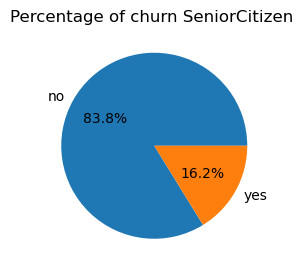

In [23]:
plt.figure(figsize=(3,4))
plt.pie(gb['SeniorCitizen'],labels=gb.index,autopct='%1.1f%%')
plt.title('Percentage of churn SeniorCitizen ')
plt.show()

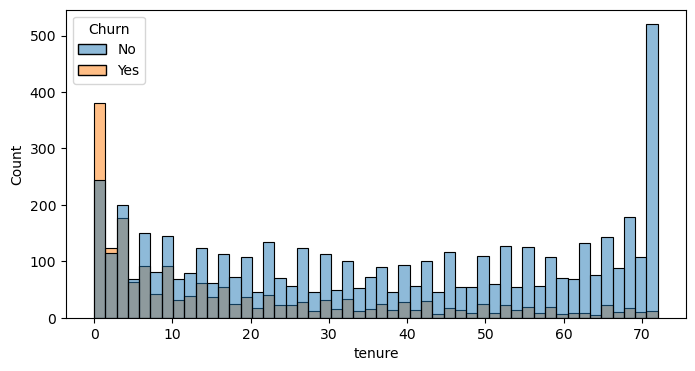

In [27]:
plt.figure(figsize=(8,4))
sns.histplot(x="tenure",data=df,bins=50,hue="Churn")
plt.show()

#people who have used our services for long time have stayed and people who have used our services for short time have churned

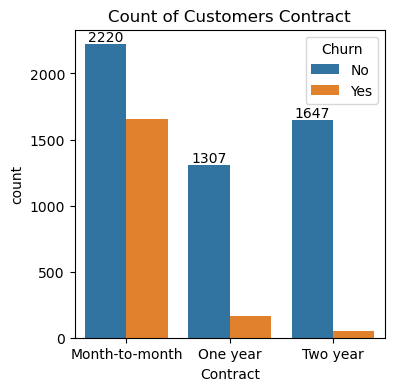

In [29]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers Contract')
plt.show()

#people who have month to month contract are likely to churn then those who have 1 or 2 years of contract

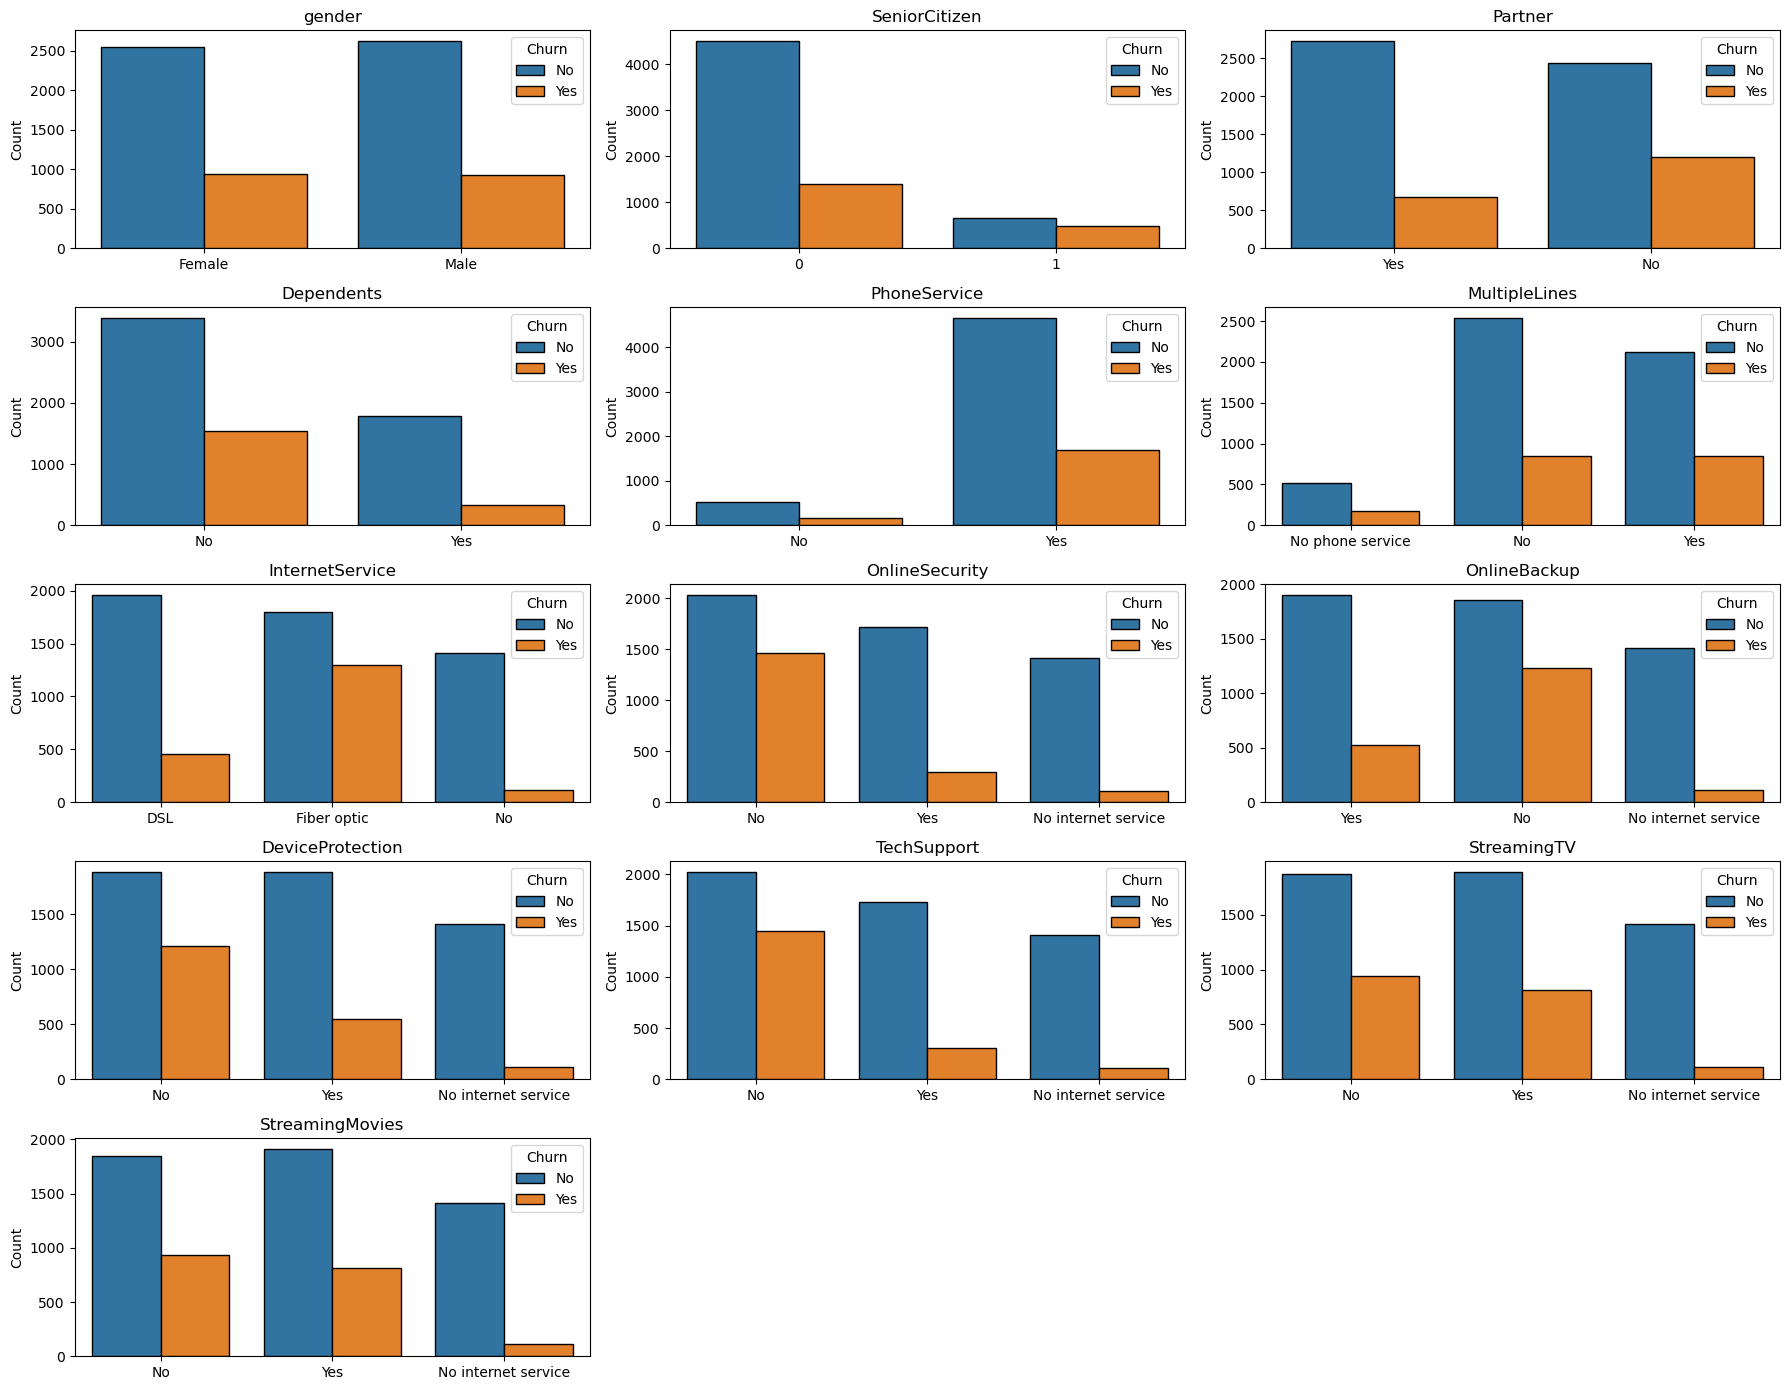

In [12]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  

plt.figure(figsize=(18, 14))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.countplot(data=df, x=col,hue='Churn', edgecolor="black")
    plt.title(col, fontsize=12)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

#Most customers are not senior citizens, and the majority have a partner or dependents = No. Internet services (DSL, Fiber optic) show a clear impact on churn, with fiber-optic users having higher churn. Customers without security/backup/tech support are more likely to churn, while streaming services have a weaker effect.

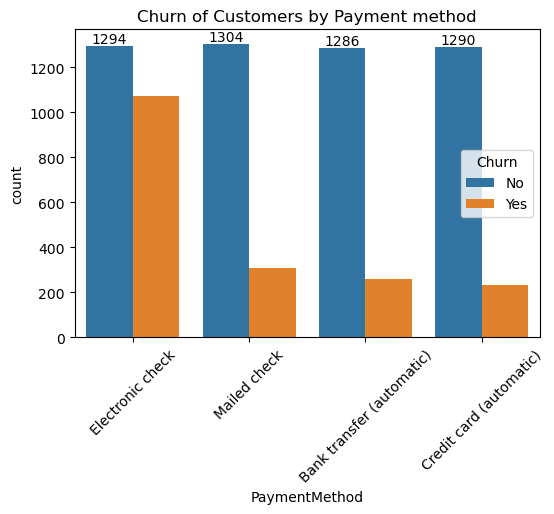

In [20]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Churn of Customers by Payment method')
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when he is using electronic check as payment method

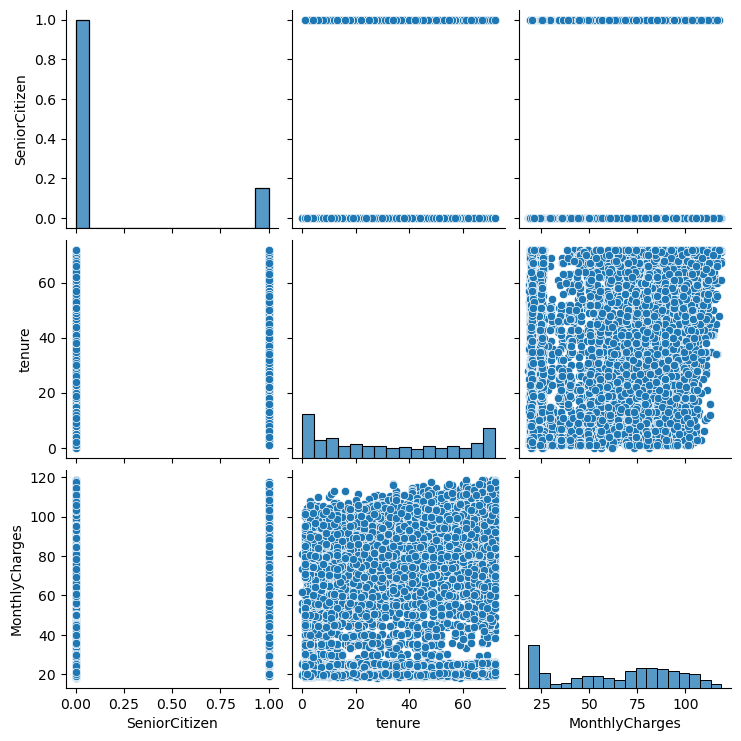

In [21]:
sns.pairplot(data=df)
plt.show()

#summary

This project focuses on analyzing customer churn patterns to identify factors that influence customer retention and attrition. Using Python for data analytics, the dataset was cleaned, processed, and explored through descriptive statistics and visualizations. Key techniques such as correlation analysis, and predictive modeling were applied to understand customer behavior.The analysis highlighted important drivers of churn, including contract type, tenure, monthly charges, and service usage. Insights from the study can help businesses implement proactive retention strategies, reduce churn rate, and improve customer satisfaction.

Key Skills & Tools: Python (Pandas, NumPy, Matplotlib, Seaborn), Data Cleaning, EDA, Business Insights.